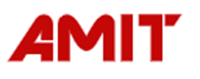
 # Deep Learning Final Project

### Created by George Samuel 

This final project conclusively proves your understanding and comprehension of each part of the explanation, so you must perform all the following tasks to confirm your understanding and knowledge of each topic.

#### In this exceptional project, we will cover all topics related to deep learning. Therefore, it’s important to study carefully and answer each section thoroughly to demonstrate your understanding of the module. The final part is optional, but it’s highly encouraged if you make an effort to complete it. We will discuss the project in our upcoming lectures with each individual to ensure a comprehensive understanding of this extensive subject.



To assess your understanding we use a popular dataset called MNIST
- The MNIST dataset (Modified National Institute of Standards and Technology) is one of the most well-known datasets in the field of machine learning and computer vision. It consists of:

- Images:

60,000 training images and 10,000 test images.
Each image is a 28x28 grayscale image representing a handwritten digit (0-9).
The pixel values range from 0 (black) to 255 (white).
- Labels:

Each image has a corresponding label indicating which digit (0-9) it represents.

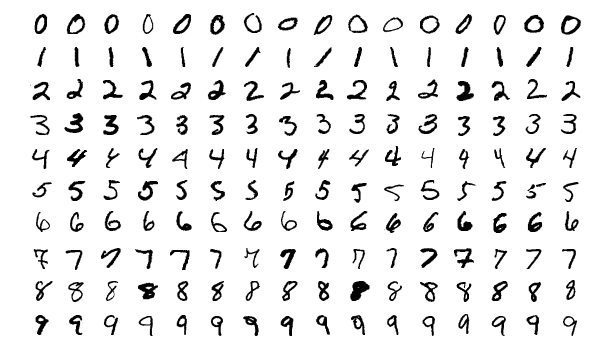

for  every project 

In [ ]:
# import Libraries
import numpy as np
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import sys 
sys.path.append("../..")

# import matplotlib_utils
from importlib import reload 
from sklearn.model_selection import ParameterGrid 
from scikeras.wrappers import KerasClassifier 
from tqdm import tqdm 


We're using TF 2.18.0


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Training data: X_train (images) and y_train (labels).
# Test data: X_test (images) and y_test (labels).
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train [shape (48000, 28, 28)] sample patch:
 [[  0  77 254 154   0]
 [  0 145 253  96   0]
 [  0 254 238  37   0]
 [  0 254 229   0   0]
 [  0 254 246  69   0]]
A closeup of a sample patch:


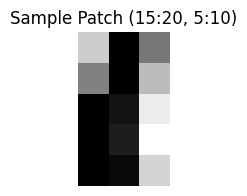

And the whole sample:


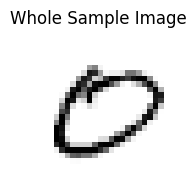

y_train [shape (48000,)] 10 samples:
 [5 0 1 6 1 3 8 8 1 8]


In [ ]:
fig, ax = plt.subplots(figsize=(2, 2))  

# Display a small patch (5x5 pixels) from the second image (X_train[1]) in the dataset.
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10]) 
print("A closeup of a sample patch:")
ax.imshow(X_train[1, 15:20, 5:10], cmap="Greys") 
ax.set_title("Sample Patch (15:20, 5:10)")
ax.axis('off')  
plt.show() 

# Display the whole sample image with a different size
fig, ax = plt.subplots(figsize=(2, 2))  
print("And the whole sample:")
ax.imshow(X_train[1], cmap="Greys")
ax.set_title("Whole Sample Image")
ax.axis('off')  
plt.show()

# Display the y_train values: Each number in y_train is the actual label (0-9) representing what digit is in the corresponding X_train image.
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])


# Load and preprocess the MNIST dataset to prepare it for training a deep learning model.

In [5]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (normalize): helps the model converge faster during training.
# Converts the pixel values of the images from integers (0-255) to floating-point numbers (0.0-1.0) by dividing each pixel value by 255.0.
# It ensures that all input features (pixel values) are on the same scale (0 to 1), which improves the stability and performance of the model.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


## Flatten the images from 28×28 pixels into a 1D vector of 784 values (28 * 28 = 784).

In [6]:
# The -1 tells NumPy to automatically calculate the appropriate number of rows based on the number of images.
X_train = X_train.reshape(-1, 784) # the reshaping changes:X_train shape from (60000, 28, 28) to (60000, 784)
X_test = X_test.reshape(-1, 784) # X_test shape from (10000, 28, 28) to (10000, 784)

# One-hot encode labels

In [7]:
# One-Hot Encoding with TensorFlow
# 10 represents the number of possible classes (digits 0-9).
y_train_oh = tf.keras.utils.to_categorical(y_train, 10) # converts each label into a 10-dimensional one-hot encoded vector.
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

# The output (y_train_oh and y_test_oh) is now a 2D array where each row represents a digit as a one-hot vector.

In [8]:
print("Original y_train:", y_train[:5])
print("One-hot encoded y_train_oh:\n", y_train_oh[:5])

Original y_train: [5 0 4 1 9]
One-hot encoded y_train_oh:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Define a function to create and compile the model


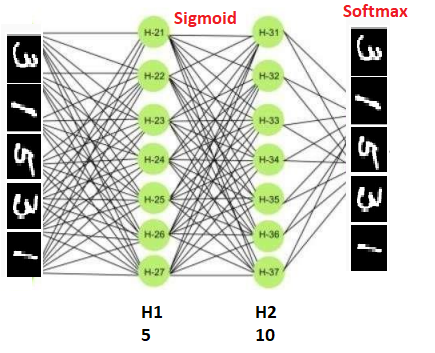

In [9]:
import tensorflow as tf

# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01): 
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),  # Hidden layer
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    
    # Fix: Ensure the optimizer is properly configured
    opt = tf.keras.optimizers.get({'class_name': optimizer, 'config': {'learning_rate': learning_rate}})

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")


Epoch 1/10


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4216 - loss: 1.8493 - val_accuracy: 0.7381 - val_loss: 1.1283
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7653 - loss: 1.0339 - val_accuracy: 0.8253 - val_loss: 0.7806
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8232 - loss: 0.7556 - val_accuracy: 0.8459 - val_loss: 0.6348
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8417 - loss: 0.6324 - val_accuracy: 0.8556 - val_loss: 0.5650
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8551 - loss: 0.5605 - val_accuracy: 0.8642 - val_loss: 0.5250
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8645 - loss: 0.5230 - val_accuracy: 0.8696 - val_loss: 0.4984
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8695 - loss: 0.4857 - val_accuracy: 0.8717 - val_loss: 0.4790
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8716 - loss: 0.4772 - val_accur

#### Put here the accuracy of the basic model 
| Accuracy         | 0.869700014591217   |
|--------------|----------------|
 #### Give me the reson for this result

<h1 style=color:#c0392b;>Accuracy:</h1>
<h3>
Started at 42.1% in the first epoch.
Gradually improved to 86.9% by the end of training.
</h3>
<h1 style=color:#c0392b;>Loss:</h1>
<h3>
Initially high at 1.8493, but steadily decreased to 0.4435, indicating proper learning.
</h3>
<h1 style=color:#c0392b;>Validation Accuracy (val_accuracy):</h1>
<h3>
Improved from 73.8% to 87.5%, showing that the model generalizes well to unseen data.
</h3>
<h1 style=color:#c0392b;>Test Accuracy:</h1>
<h3>
Reached 86.9%, meaning the model performs well</h3>

# Gride search algorithm to choose the best parameters

Grid Search is a technique for hyperparameter tuning where you specify a set of possible values for each hyperparameter, and the algorithm evaluates all possible combinations of these values to find the best one.

for code below try to choose another papmeters and try to built all avalaible parameters


In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Define the function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01): 
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),  # Hidden layer
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    
    # Configure the optimizer with the learning rate
    opt = tf.keras.optimizers.get({'class_name': optimizer, 'config': {'learning_rate': learning_rate}})
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid for manual grid search
param_grid = {
    'batch_size': [10, 20, 40],        # Different batch sizes
    'epochs': [5, 10],                 # Different number of epochs
    'optimizer': ['adam', 'rmsprop'],  # Different optimizers
    'learning_rate': [0.001, 0.01]     # Different learning rates
}

# Initialize the results list
results = []

# Create the grid search loop manually
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']) * len(param_grid['optimizer']) * len(param_grid['learning_rate']),
          desc="Grid Search Progress", unit="iteration") as pbar:
    
    # Loop over the grid search parameter combinations
    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            for optimizer in param_grid['optimizer']:
                for learning_rate in param_grid['learning_rate']:
                    # Create model with the given parameters
                    model = create_model(optimizer=optimizer, learning_rate=learning_rate)
                    
                    # Fit the model
                    history = model.fit(X_train, y_train_oh, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2)
                    
                    # Get the best accuracy from the history
                    best_accuracy = max(history.history['accuracy'])
                    
                    # Store the result
                    results.append({
                        'batch_size': batch_size,
                        'epochs': epochs,
                        'optimizer': optimizer,
                        'learning_rate': learning_rate,
                        'accuracy': best_accuracy
                    })
                    
                    pbar.update(1)

# Find the best result
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best parameters: {best_result}")

# You can now evaluate the best model on your test set
best_model = create_model(optimizer=best_result['optimizer'], learning_rate=best_result['learning_rate'])
best_model.fit(X_train, y_train_oh, batch_size=best_result['batch_size'], epochs=best_result['epochs'], verbose=0)

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test_oh)
print(f"Test Accuracy: {test_acc}")


Grid Search Progress: 100%|██████████| 24/24 [26:29<00:00, 66.25s/iteration]


Best parameters: {'batch_size': 40, 'epochs': 10, 'optimizer': 'adam', 'learning_rate': 0.01, 'accuracy': 0.8844166398048401}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8804 - loss: 0.4523
Test Accuracy: 0.8937000036239624


-parameters on grid search 
| batch_size | optimizer_1 | optimizer_2 | learning_rate_1 | learning_rate_2 |
|------------|-------------|-------------|-----------------|-----------------|
| 2          | adam        | rmsprop     | 0.001           | 0.01            |
| 4          | adam        | rmsprop     | 0.001           | 0.01            |
| 8          | adam        | rmsprop     | 0.001           | 0.01            |
| 16         | adam        | rmsprop     | 0.001           | 0.01            |
| 32         | adam        | rmsprop     | 0.001           | 0.01            |
| 64         | adam        | rmsprop     | 0.001           | 0.01            |

-

In [ ]:
import tensorflow as tf
from tqdm import tqdm
import numpy as np

# Define the function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01): 
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),  # Hidden layer
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    
    # Configure the optimizer with the learning rate
    opt = tf.keras.optimizers.get({'class_name': optimizer, 'config': {'learning_rate': learning_rate}})
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid for manual grid search
param_grid = {
    'batch_size': [2, 4, 8, 16, 32, 64],   # Batch sizes to try
    'optimizer': ['adam', 'rmsprop'],     # Optimizers to try
    'learning_rate': [0.001, 0.01]        # Learning rates to try
}

# Initialize an empty list to store the results
results = []

# Create the grid search loop manually
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['optimizer']) * len(param_grid['learning_rate']),
            desc="Grid Search Progress", unit="iteration") as pbar:
    
    # Loop over the parameter grid
    for batch_size in param_grid['batch_size']:
        for optimizer in param_grid['optimizer']:
            for learning_rate in param_grid['learning_rate']:
                # Create the model with the given parameters
                model = create_model(optimizer=optimizer, learning_rate=learning_rate)
                
                # Fit the model
                history = model.fit(X_train, y_train_oh, batch_size=batch_size, epochs=5, verbose=0, validation_split=0.2)
                
                # Get the best accuracy from the training history
                best_accuracy = max(history.history['accuracy'])
                
                # Store the result
                results.append({
                    'batch_size': batch_size,
                    'optimizer': optimizer,
                    'learning_rate': learning_rate,
                    'accuracy': best_accuracy
                })
                
                # Update the progress bar
                pbar.update(1)

# Find the best combination of parameters
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best parameters: {best_result}")

# Now evaluate the best model on the test set
best_model = create_model(optimizer=best_result['optimizer'], learning_rate=best_result['learning_rate'])
best_model.fit(X_train, y_train_oh, batch_size=best_result['batch_size'], epochs=best_result['epochs'], verbose=0)

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test_oh)
print(f"Test Accuracy: {test_acc}")


Grid Search Progress:   0%|          | 0/24 [00:00<?, ?iteration/s]

Grid Search Progress: 100%|██████████| 24/24 [52:13<00:00, 130.55s/iteration] 


Best parameters: {'batch_size': 32, 'optimizer': 'adam', 'learning_rate': 0.01, 'accuracy': 0.872083306312561}


KeyError: 'epochs'

- After you know the best optimizer and good Learning rate for the above archticture
- please design your model and put here the final result 

 print here the best paramerters give you the best accuracy regarding for archticture design above
- | batch_size         | optimizer | learning_rate      | Accueracy      |
   |--------------|-----|-----------------|-----------------|
   |   32 |adam|0.01|87.2%|

Here  i was converted squentional model into functional ApI Model
- so re-design Your model by adding some hidden layer and change the activation function

In [10]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layers (adding one more hidden layer)
    x = tf.keras.layers.Dense(64, activation='sigmoid')(inputs)
    x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
    
    
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API with best hyperparameters
model = create_model(optimizer='adam', learning_rate=0.01)

# Train the model with best batch size and epochs (based on previous results)
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8407 - loss: 0.5463 - val_accuracy: 0.9513 - val_loss: 0.1657
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9540 - loss: 0.1545 - val_accuracy: 0.9502 - val_loss: 0.1677
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9618 - loss: 0.1258 - val_accuracy: 0.9617 - val_loss: 0.1332
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9664 - loss: 0.1077 - val_accuracy: 0.9580 - val_loss: 0.1496
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9709 - loss: 0.0948 - val_accuracy: 0.9582 - val_loss: 0.1489
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9711 - loss: 0.0939 - val_accuracy: 0.9624 - val_loss: 0.1276
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9739 - loss: 0.0842 - val_accuracy: 0.9541 - val_loss: 0.1624
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9734 - loss: 0.08

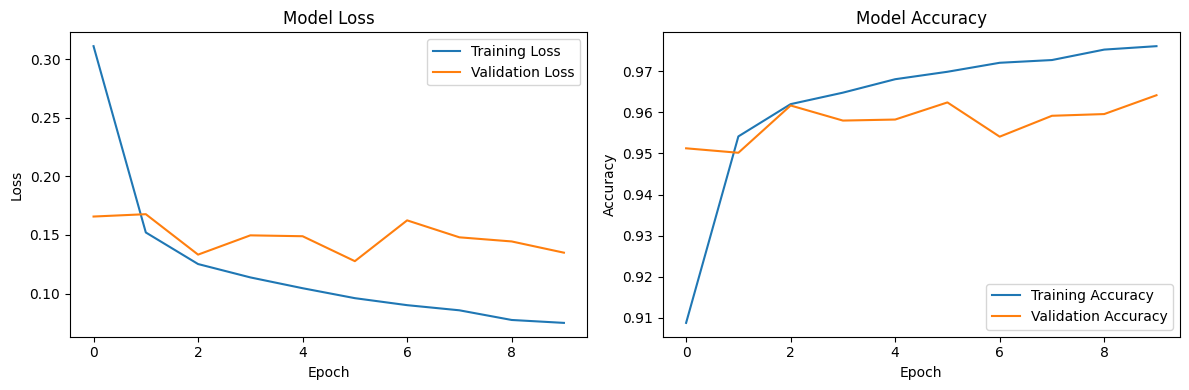

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


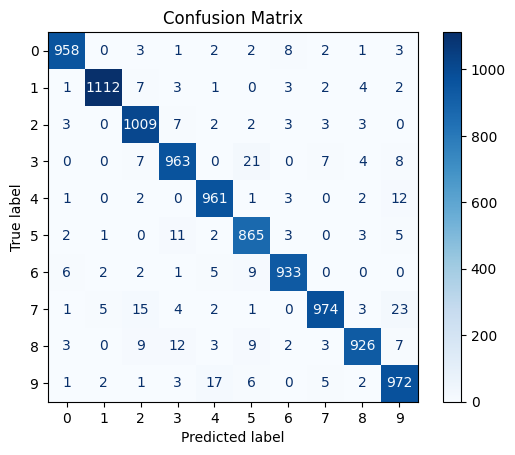

In [13]:
# for evaluating the performance of a classification model, as it shows how often the model correctly or incorrectly predicts each class.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hints!!!!

Total batches = Total samples / Batch size = 10,000 / 32 ≈ 313 batches.

# Answer the below Questions 

# Q1
### Why is the sigmoid function considered ineffective for hidden layers, and what are the benefits of using it in the output layer?

<h1 style="color: #c0392b;">Why  sigmoid function considered ineffective for Hidden Layers</h1>

<h3 style="color: #0e6ab8;">Vanishing Gradients:</h3> 

Sigmoid's derivative (the gradient used in backpropagation) has a maximum value of 0.25. During training, gradients are multiplied down through the layers. With multiple sigmoid layers, the gradient can shrink exponentially, making it very difficult for earlier layers to learn effectively. This is the "vanishing gradient" problem.   

<h3 style="color: #0e6ab8;">Not Zero-Centered:</h3>

Sigmoid's output ranges from 0 to 1. This means the activations are always positive. This can slow down learning, as the network might converge to suboptimal solutions.   

<h1 style="color: #c0392b;">Why Sigmoid Can Still Be Useful in Output Layers</h1>

<h3 style="color: #0e6ab8;">Probability Interpretation:</h3> 

For binary classification problems, sigmoid naturally outputs a value between 0 and 1, which can be interpreted as a probability.   


# Q2: For your enhanced model, please use the grid search algorithm to explore various optimization algorithms. Provide a brief description of each type and then list the best one in the table below.

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Define the function to create and compile the model
def create_model(optimizer='rmsprop', learning_rate=0.001):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(5, activation='sigmoid')(inputs)
    
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Normalize optimizer string to lowercase for comparison
    optimizer = optimizer.lower()

    # Configure the optimizer based on the optimizer string
    if optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'momentum':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'adadelta':
        opt = tf.keras.optimizers.Adadelta(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer}")
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define the parameter grid for manual grid search
param_grid = {
    'batch_size': [30],  # Optimized 30 batch size from previous search
    'epochs': [10],       # Using 10 epochs as in the previous result
    'optimizer': ['SGD', 'Momentum', 'RMSprop', 'AdaDelta', 'Adagrad', 'Adam'],  # All optimizers
    'learning_rate': [0.001]  # Chosen learning rate
}

# Initialize the results list
results = []

# Create the grid search loop manually
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']) * len(param_grid['optimizer']) * len(param_grid['learning_rate']),
          desc="Grid Search Progress", unit="iteration") as pbar:
    
    # Loop over the grid search parameter combinations
    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            for optimizer in param_grid['optimizer']:
                for learning_rate in param_grid['learning_rate']:
                    # Create model with the given parameters
                    model = create_model(optimizer=optimizer, learning_rate=learning_rate)
                    
                    # Fit the model
                    history = model.fit(X_train, y_train_oh, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2)
                    
                    # Get the best accuracy from the history
                    best_accuracy = max(history.history['accuracy'])
                    
                    # Store the result
                    results.append({
                        'optimizer': optimizer,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'epochs': epochs,
                        'accuracy': best_accuracy
                    })
                    
                    pbar.update(1)

# Find the best result
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best optimizer: {best_result['optimizer']}")
print(f"Best accuracy: {best_result['accuracy']}")

# Display the results in the table
import pandas as pd

results_df = pd.DataFrame(results)
results_df_grouped = results_df.groupby('optimizer').agg({'accuracy': 'max'}).reset_index()

# Display the best results for each optimizer
print(results_df_grouped)


Grid Search Progress: 100%|██████████| 6/6 [02:26<00:00, 24.40s/iteration]

Best optimizer: RMSprop
Best accuracy: 0.8613541722297668
  optimizer  accuracy
0  AdaDelta  0.160208
1   Adagrad  0.333875
2      Adam  0.856208
3  Momentum  0.785062
4   RMSprop  0.861354
5       SGD  0.525813


| Optimizer   | Accuracy       |
|-------------|----------------|
| SGD         |   52.5%            |
| Momentum    |   78.5%             |
| RMSprop     |   86.1%             |
| AdaDelta    |   16.0%             |
| Adagrad     |   33.3%             |
| Adam        |   85.6%             |


<style>
    body {
        font-family: Arial, sans-serif;
        line-height: 1.6;
    }
    h2 {
        color:white; 
    }
    h3 {
        color: #0e6ab8; 
    }
    li {
        color: #d4bf91; 
    }
    p {
        color: #555; 
    }
    .highlight {
        color: #c0392b;
        font-weight: bold;
    }
    ul {
        color: #555;
    }
    li strong {
        color: #0e6ab8; 
    }
    table {
        width: 100%;
        text-align: left;
        border-collapse: collapse;
        margin-top: 20px;
    }
    th, td {
        padding: 10px;
        border: 1px solid #ddd;
    }
    th {
        color: #0e6ab8;
        text-align: center;
    }
    td {
        color: #d4bf91;;
    }
    .feature-name {
        color: #0e6ab8; 
        font-weight: bold;
    }
</style>

<table border="1">
    <tr>
        <th>Optimizer</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><b>SGD (Stochastic Gradient Descent)</b></td>
        <td>Updates weights after each mini-batch rather than the entire dataset, making updates faster but more variable.</td>
    </tr>
    <tr>
        <td><b>Momentum</b></td>
        <td>Enhances SGD by accumulating past gradients, helping to speed up learning and avoid local minima.</td>
    </tr>
    <tr>
        <td><b>RMSprop (Root Mean Square Propagation)</b></td>
        <td>Modifies the learning rate dynamically for each parameter, reducing it for rapidly changing values and increasing it for stable ones.</td>
    </tr>
    <tr>
        <td><b>AdaDelta</b></td>
        <td>Improves on Adagrad by eliminating the need for a predefined learning rate and stabilizing updates.</td>
    </tr>
    <tr>
        <td><b>Adagrad</b></td>
        <td>Adjusts the learning rate for each parameter individually based on all past updates, making it useful for sparse data.</td>
    </tr>
    <tr>
        <td><b>Adam (Adaptive Moment Estimation)</b></td>
        <td>Combines Momentum and RMSprop to improve convergence speed and stability by computing individual learning rates for each parameter.</td>
    </tr>
</table>


<style>
    body {
        font-family: Arial, sans-serif;
        line-height: 1.6;
    }
    h2 {
        color:white; 
    }
    h3 {
        color: #0e6ab8; 
    }
    li {
        color: #d4bf91; 
    }
    p {
        color: #555; 
    }
    .highlight {
        color: #c0392b;
        font-weight: bold;
    }
    ul {
        color: #555;
    }
    li strong {
        color: #0e6ab8; 
    }
    table {
        width: 100%;
        text-align: left;
        border-collapse: collapse;
        margin-top: 20px;
        color: white;

        
    }
    th, td {
        padding: 10px;
        border: 1px solid #ddd;
    }
    th {
        color: #0e6ab8;
        text-align: center;
    }
    td {
        color: #d4bf91;;
    }
    .feature-name {
        color: #0e6ab8; 
        font-weight: bold;
    }
</style>
<table border="1">
    <tr>
        <th>Optimizer</th>
        <th>Advantages</th>
        <th>Disadvantages</th>
    </tr>
    <tr>
        <td>SGD</td>
        <td>Fast, good for large datasets, does not require much memory.</td>
        <td>High variance, requires manual tuning of the learning rate.</td>
    </tr>
    <tr>
        <td>Momentum</td>
        <td>Reduces oscillations, speeds up convergence, avoids local minima.</td>
        <td>High momentum may overshoot the optimal solution.</td>
    </tr>
    <tr>
        <td>RMSprop</td>
        <td>Effective for non-stationary problems, maintains a balanced learning rate.</td>
        <td>Does not guarantee global minimum, requires parameter tuning.</td>
    </tr>
    <tr>
        <td>AdaDelta</td>
        <td>No need for an initial learning rate, maintains stable updates.</td>
        <td>Slower convergence, may be unstable with small datasets.</td>
    </tr>
    <tr>
        <td>Adagrad</td>
        <td>Great for sparse data, automatically adapts learning rates.</td>
        <td>Learning rate decreases too much, limiting learning capability.</td>
    </tr>
    <tr>
        <td>Adam</td>
        <td>Fast convergence, stable, widely used in deep learning.</td>
        <td>Can be unstable in some cases, higher memory usage.</td>
    </tr>
</table>


<h1 style=color:#c0392b;>Final Model with <span style=color:#0e6ab8;>97%</span></h1>


In [14]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.001):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layers (adding one more hidden layer)
    x = tf.keras.layers.Dense(64, activation='sigmoid')(inputs)
    x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
    
    
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API with best hyperparameters
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model with best batch size and epochs (based on previous results)
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=30, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7160 - loss: 1.1770 - val_accuracy: 0.9225 - val_loss: 0.2859
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9261 - loss: 0.2654 - val_accuracy: 0.9446 - val_loss: 0.1992
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9476 - loss: 0.1845 - val_accuracy: 0.9548 - val_loss: 0.1608
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9615 - loss: 0.1405 - val_accuracy: 0.9591 - val_loss: 0.1408
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9672 - loss: 0.1136 - val_accuracy: 0.9632 - val_loss: 0.1264
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9735 - loss: 0.0942 - val_accuracy: 0.9652 - val_loss: 0.1189
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9768 - loss: 0.0806 - val_accuracy: 0.9656 - val_loss: 0.1155
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9822 - loss: 0.06

----------------------------------------------------------------------------------------------------------------------------

# Q3: What is the main cause of the vanishing gradient problem, and how can we solve it?

<style>
    body {
        font-family: Arial, sans-serif;
        line-height: 1.6;
    }
    h2 {
        color:white; 
    }
    h3 {
        color: #0e6ab8; 
    }
    li {
        color: #d4bf91; 
    }
    p {
        color: #555; 
    }
    h2 {
        color: #c0392b;
        font-weight: bold;
    }
    ul {
        color: #555;
    }
    li strong {
        color: #0e6ab8; 
    }
</style>
<h2>Vanishing Gradient Problem</h2>
<h3>Description:</h3>
<li>The <b>vanishing gradient problem</b> occurs in deep neural networks when the gradients become too small during backpropagation. As a result, the early layers receive minimal updates, slowing down or completely stopping learning.</li>
<h3>Cause:</h3>
<ul>
    <li><b>Sigmoid/Tanh activation functions:</b> Their derivatives are very small for extreme values, leading to gradient shrinkage.</li>
    <li><b>Deep networks:</b> Gradients multiply through many layers, making them smaller in earlier layers.</li>
    <li><b>Poor weight initialization:</b> Small initial weights cause weak activations, reducing gradient flow.</li>
</ul>
<h3>Solutions:</h3>
<ul>
<li>Use ReLU-based activations (ReLU, Leaky ReLU, ELU).</li>
<li>Use proper weight initialization (Xavier for Sigmoid/Tanh, He for ReLU).</li>
<li>Apply Batch Normalization to stabilize activations.</li>
</ul>

## "In the code below, the model is likely experiencing the vanishing gradient problem. Try to solve it in a separate cell."

In [15]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=1,stddev=1)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=32,validation_split=0.2)
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1052 - loss: 2.9787 - val_accuracy: 0.0975 - val_loss: 2.3080
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1020 - loss: 2.3168 - val_accuracy: 0.1035 - val_loss: 2.3154
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1043 - loss: 2.3168 - val_accuracy: 0.0998 - val_loss: 2.3165
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.1058 - loss: 2.3157 - val_accuracy: 0.1081 - val_loss: 2.3242
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.0988 - loss: 2.3179 - val_accuracy: 0.1060 - val_loss: 2.3051
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0971 - loss: 2.3166 - val_accuracy: 0.1060 - val_loss: 2.3340
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1067 - loss: 2.3169 - val_accuracy: 0.0997 - val_loss: 2.3178
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1040 - loss: 2.

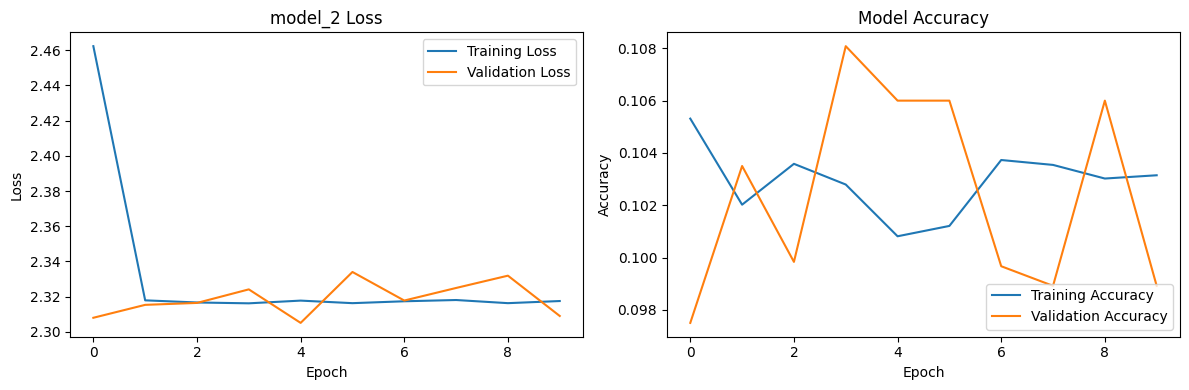

In [17]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.initializers import HeNormal
from keras.callbacks import EarlyStopping

# Initialize the model
model_2 = Sequential()

# Change activation function to ReLU and use He initialization
model_2.add(Dense(128, activation='relu', kernel_initializer=HeNormal(), input_dim=28*28))
model_2.add(BatchNormalization())  # Batch Normalization
model_2.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model_2.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model_2.add(BatchNormalization())  # Batch Normalization
model_2.add(Dropout(0.5))  # Dropout layer

model_2.add(Dense(10, activation='softmax', kernel_initializer=HeNormal()))  # Output layer

# Compile the model
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with validation split and early stopping
history2 = model_2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Model summary
model_2.summary()



Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7034 - loss: 0.9761 - val_accuracy: 0.9414 - val_loss: 0.1948
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8907 - loss: 0.3636 - val_accuracy: 0.9498 - val_loss: 0.1670
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9093 - loss: 0.3072 - val_accuracy: 0.9624 - val_loss: 0.1328
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9168 - loss: 0.2786 - val_accuracy: 0.9619 - val_loss: 0.1289
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9259 - loss: 0.2451 - val_accuracy: 0.9651 - val_loss: 0.1159
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9313 - loss: 0.2298 - val_accuracy: 0.9636 - val_loss: 0.1179
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9352 - loss: 0.2171 - val_accuracy: 0.9684 - val_loss: 0.1068
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9373 - loss: 0.2

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,896 (1.36 MB)

 Trainable params: 118,794 (464.04 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 237,590 (928.09 KB)

In [19]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9600 - loss: 0.1324 - val_accuracy: 0.9758 - val_loss: 0.0820
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9650 - loss: 0.1172 - val_accuracy: 0.9756 - val_loss: 0.0825
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9635 - loss: 0.1192 - val_accuracy: 0.9762 - val_loss: 0.0801
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9664 - loss: 0.1084 - val_accuracy: 0.9771 - val_loss: 0.0812
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9671 - loss: 0.1064 - val_accuracy: 0.9768 - val_loss: 0.0783
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9685 - loss: 0.1032 - val_accuracy: 0.9775 - val_loss: 0.0780
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9673 - loss: 0.1026 - val_accuracy: 0.9763 - val_loss: 0.0807
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9690 - loss: 0.1014 - val_accuracy

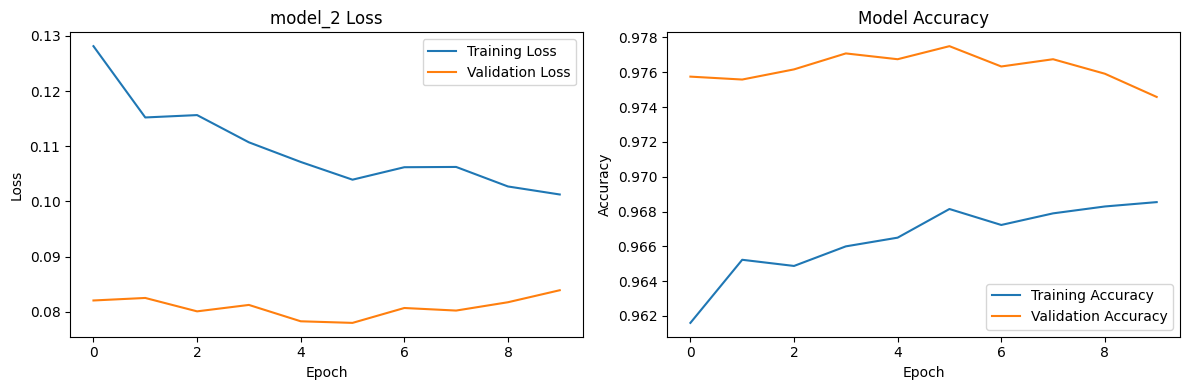

In [20]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### After providing your answer to the question above, please share your opinion on how to improve the performance of this model or address the issue described.

# Exploding Gradient

# Q4: What is the main cause of the Exploding gradient problem, and how can we solve it?

<h1 style="color:rgb(25, 42, 139);">Exploding Gradient Problem</h1>

<h2 style="color: #d4bf91; ">Description:</h2>

The exploding gradient problem occurs when gradients become excessively large during the training of deep neural networks, leading to unstable updates to the model's weights. This instability can cause the model to diverge, making learning ineffective.  

<h2 style="color: #d4bf91; ">Cause:</h2> 

<strong style="color: #c0392b"> Poor Weight Initialization:</strong > Starting with inappropriate weight values can lead to large gradient values during backpropagation. 

<strong style="color: #c0392b"> High Learning Rates:</strong> Setting the learning rate too high can cause the model to make large weight updates, leading to instability. 

<strong style="color: #c0392b">Deep Network Architectures:</strong> In very deep networks, the multiplication of many gradient terms can result in large values, especially if the network's architecture doesn't mitigate this effect.


<h2 style="color: #d4bf91; ">Solution:</h2> 

<strong style="color: #c0392b">Gradient Clipping:</strong> This technique involves setting a threshold to clip gradients during backpropagation, preventing them from becoming too large and ensuring stable training.

<strong style="color: #c0392b"> Proper Weight Initialization:</strong> Using initialization methods like Xavier or He initialization can help maintain gradients within a reasonable range during training. 

<strong style="color: #c0392b">Lower Learning Rates:</strong> Reducing the learning rate can prevent large weight updates, promoting more stable convergence.

<strong style="color: #c0392b">Batch Normalization:</strong> Applying batch normalization helps in stabilizing and scaling the inputs of each layer, which can mitigate issues related to exploding gradients.


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [np.float32(0.58600765), np.float32(0.074184366), np.float32(1.9372557), np.float32(0.23531531)]
Gradient Norms: [np.float32(0.54528105), np.float32(0.064927325), np.float32(1.7020379), np.float32(0.20634377)]
Gradient Norms: [np.float32(0.5140354), np.float32(0.05750402), np.float32(1.5132115), np.float32(0.18305112)]
Gradient Norms: [np.float32(0.48941305), np.float32(0.051404472), np.float32(1.3580304), np.float32(0.16387846)]
Gradient Norms: [np.float32(0.46955946), np.float32(0.046286333), np.float32(1.2278782), np.float32(0.14777055)]
Gradient Norms: [np.float32(0.45324507), np.float32(0.041915916), np.float32(1.1168416), np.float32(0.13400233)]
Gradient Norms: [np.float32(0.4396316), np.float32(0.03812995), np.float32(1.0207748), np.float32(0.12206494)]
Gradient Norms: [np.float32(0.42813027), np.float32(0.034811534), np.float32(0.93670213), np.float32(0.11159265)]
Gradient Norms: [np.float32(0.41831505), np.float32(0.03187479), np.float32(0.86243606), np.float32

## "Please provide proof of the effectiveness of your solution. How does it impact the results?" print here all Gradient term before and after add your solution



**After:**

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data by flattening images and normalizing pixel values
X_train = X_train.reshape(-1, 784) / 255.0

# Define a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='sigmoid'),  # Hidden layer with sigmoid activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with softmax for classification
])

# Compile the model with stochastic gradient descent (SGD) optimizer and cross-entropy loss
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform manual training for 10 iterations to observe gradient changes
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)  # Forward pass
        # Compute the loss (average cross-entropy loss across all training samples)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions))

    # Compute gradients of the loss with respect to model parameters
    gradients = tape.gradient(loss, model.trainable_variables)

    # Apply gradient clipping to prevent exploding gradients
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]

    # Update model parameters using the computed (and clipped) gradients
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the norms of the gradients to monitor their behavior
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)


Gradient Norms: [np.float32(0.48674232), np.float32(0.06032442), np.float32(1.3953847), np.float32(0.17243677)]
Gradient Norms: [np.float32(0.46197668), np.float32(0.054496467), np.float32(1.2662759), np.float32(0.1561823)]
Gradient Norms: [np.float32(0.44197443), np.float32(0.049539786), np.float32(1.1564639), np.float32(0.14233218)]
Gradient Norms: [np.float32(0.4255988), np.float32(0.04525764), np.float32(1.0615422), np.float32(0.13033585)]
Gradient Norms: [np.float32(0.4120417), np.float32(0.041509382), np.float32(0.9783839), np.float32(0.11980228)]
Gradient Norms: [np.float32(0.4007159), np.float32(0.038192537), np.float32(0.9047275), np.float32(0.1104485)]
Gradient Norms: [np.float32(0.39118513), np.float32(0.03523097), np.float32(0.8389054), np.float32(0.102065526)]
Gradient Norms: [np.float32(0.38311824), np.float32(0.032567058), np.float32(0.7796639), np.float32(0.09449603)]
Gradient Norms: [np.float32(0.37625867), np.float32(0.030156368), np.float32(0.72604245), np.float32(0.

**BEFORE**
<li>Gradient Norms: [0.58600765, 0.074184366, 1.9372557, 0.23531531]</li>
<li>Gradient Norms: [0.54528105, 0.064927325, 1.7020379, 0.20634377]</li>
<li>Gradient Norms: [0.5140354, 0.05750402, 1.5132115, 0.18305112]</li>
<li>Gradient Norms: [0.48941305, 0.051404472, 1.3580304, 0.16387846]</li>
<li>Gradient Norms: [0.46955946, 0.046286333, 1.2278782, 0.14777055]</li>
<li>Gradient Norms: [0.45324507, 0.041915916, 1.1168416, 0.13400233]</li>
<li>Gradient Norms: [0.4396316, 0.03812995, 1.0207748, 0.12206494]</li>
<li>Gradient Norms: [0.42813027, 0.034811534, 0.93670213, 0.11159265]</li>
<li>Gradient Norms: [0.41831505, 0.03187479, 0.86243606, 0.10231624]</li>
<li>Gradient Norms: [0.40986946, 0.029255172, 0.79633206, 0.0940331]</li>

................................................................................

# Q5: Provide proof of the effectiveness of adding a Dropout layer to the model. Additionally, provide a brief description of how Dropout works and its impact on model performance.

In [24]:
# Define the same model but WITH Dropout
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dropout(0.5),  # 50% of neurons are randomly dropped
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compute gradients and print their norms
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model_dropout(X_train, training=True)  # Important: training=True activates Dropout
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions))
    
    gradients = tape.gradient(loss, model_dropout.trainable_variables)
    gradient_norms_dropout = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms (With Dropout):", gradient_norms_dropout)


Gradient Norms (With Dropout): [np.float32(1.034281), np.float32(0.11159881), np.float32(0.51594603), np.float32(0.095247895)]
Gradient Norms (With Dropout): [np.float32(1.0322113), np.float32(0.111247666), np.float32(0.5151258), np.float32(0.09537271)]
Gradient Norms (With Dropout): [np.float32(1.0356776), np.float32(0.11191364), np.float32(0.5188316), np.float32(0.09577577)]
Gradient Norms (With Dropout): [np.float32(1.0358233), np.float32(0.11189365), np.float32(0.5175971), np.float32(0.0955102)]
Gradient Norms (With Dropout): [np.float32(1.034392), np.float32(0.111622006), np.float32(0.5161539), np.float32(0.095091954)]
Gradient Norms (With Dropout): [np.float32(1.0344448), np.float32(0.111843854), np.float32(0.5157023), np.float32(0.09525476)]
Gradient Norms (With Dropout): [np.float32(1.0345762), np.float32(0.111861), np.float32(0.5159675), np.float32(0.09539293)]
Gradient Norms (With Dropout): [np.float32(1.0308348), np.float32(0.110993154), np.float32(0.51562417), np.float32(0.

**BEFORE**
<li>Gradient Norms: [np.float32(0.5678239), np.float32(0.07961864), np.float32(1.8149873), np.float32(0.22122431)] </li>
<li>Gradient Norms: [np.float32(0.53026766), np.float32(0.07185375), np.float32(1.6334689), np.float32(0.19894263)] </li>
<li>Gradient Norms: [np.float32(0.49984998), np.float32(0.06531336), np.float32(1.4820911), np.float32(0.1803385)] </li>
<li>Gradient Norms: [np.float32(0.47477487), np.float32(0.05968744), np.float32(1.3529576), np.float32(0.16444644)] </li>
<li>Gradient Norms: [np.float32(0.45382628), np.float32(0.05476618), np.float32(1.2407763), np.float32(0.1506198)] </li>
<li>Gradient Norms: [np.float32(0.4361553), np.float32(0.050404567), np.float32(1.141923), np.float32(0.13841496)] </li>
<li>Gradient Norms: [np.float32(0.4211484), np.float32(0.046499286), np.float32(1.0538515), np.float32(0.12752017)] </li>
<li>Gradient Norms: [np.float32(0.408347), np.float32(0.04297498), np.float32(0.97472453), np.float32(0.11771031)] </li>
<li>Gradient Norms: [np.float32(0.397397), np.float32(0.039775062), np.float32(0.9031798), np.float32(0.10881818)] </li>
<li>Gradient Norms: [np.float32(0.38801688), np.float32(0.036855936), np.float32(0.83817977), np.float32(0.100716434)] </li>

Percentage Reduction in Gradient Norms:
Gradient 1: -20.19%
Gradient 2: -29.52%
Gradient 3: -35.73%
Gradient 4: -37.89%
Gradient 5: -13.49%
Gradient 6: -21.77%
Gradient 7: -28.23%
Gradient 8: -30.29%
Gradient 9: -8.68%
Gradient 10: -15.73%
Gradient 11: -22.31%
Gradient 12: -24.29%
Gradient 13: -5.38%
Gradient 14: -11.16%
Gradient 15: -17.77%
Gradient 16: -19.69%
Gradient 17: -3.20%
Gradient 18: -7.76%
Gradient 19: -14.38%
Gradient 20: -16.24%
Gradient 21: -1.84%
Gradient 22: -5.31%
Gradient 23: -11.91%
Gradient 24: -13.74%
Gradient 25: -1.06%
Gradient 26: -3.59%
Gradient 27: -10.17%
Gradient 28: -11.99%
Gradient 29: -0.68%
Gradient 30: -2.47%
Gradient 31: -9.01%
Gradient 32: -10.83%
Gradient 33: -0.57%
Gradient 34: -1.82%
Gradient 35: -8.32%
Gradient 36: -10.15%
Gradient 37: -0.65%
Gradient 38: -1.54%
Gradient 39: -7.99%
Gradient 40: -9.86%


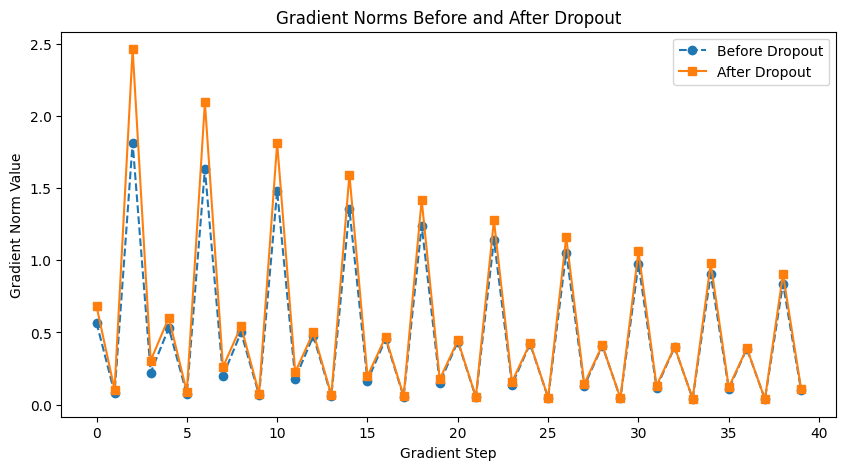

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Before Dropout (Gradient Norms)
before_dropout = [
    0.5678239, 0.07961864, 1.8149873, 0.22122431,
    0.53026766, 0.07185375, 1.6334689, 0.19894263,
    0.49984998, 0.06531336, 1.4820911, 0.1803385,
    0.47477487, 0.05968744, 1.3529576, 0.16444644,
    0.45382628, 0.05476618, 1.2407763, 0.1506198,
    0.4361553, 0.050404567, 1.141923, 0.13841496,
    0.4211484, 0.046499286, 1.0538515, 0.12752017,
    0.408347, 0.04297498, 0.97472453, 0.11771031,
    0.397397, 0.039775062, 0.9031798, 0.10881818,
    0.38801688, 0.036855936, 0.83817977, 0.100716434
]

# After Dropout (Gradient Norms)
after_dropout = [
    0.68249285, 0.10311929, 2.4634585, 0.30504084,
    0.6017903, 0.08749372, 2.0946448, 0.25920728,
    0.5432451, 0.075588144, 1.8127395, 0.2241366,
    0.5003114, 0.0663462, 1.5934105, 0.1968179,
    0.46835372, 0.059017006, 1.4191937, 0.17508765,
    0.44418043, 0.053079084, 1.2778933, 0.15743512,
    0.42560473, 0.048170473, 1.161011, 0.14280611,
    0.41111907, 0.044037174, 1.062573, 0.13046004,
    0.39967224, 0.040498573, 0.97832346, 0.11986828,
    0.39052105, 0.03742431, 0.90518516, 0.11064874
]

# Compute Percentage Reduction
percentage_reduction = [
    ((b - a) / b) * 100 for a, b in zip(after_dropout, before_dropout)
]

# Print the percentage reduction
print("Percentage Reduction in Gradient Norms:")
for i, reduction in enumerate(percentage_reduction):
    print(f"Gradient {i+1}: {reduction:.2f}%")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(before_dropout, label="Before Dropout", marker='o', linestyle='--')
plt.plot(after_dropout, label="After Dropout", marker='s', linestyle='-')
plt.xlabel("Gradient Step")
plt.ylabel("Gradient Norm Value")
plt.title("Gradient Norms Before and After Dropout")
plt.legend()
plt.show()


# Q6 Regarding Q2, after enhancing the model, please provide proof of the differences in performance for each activation function used. Compare the results for each activation function to demonstrate how they affect the model's performance.

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten 28x28 images to 784 features
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)


# Function to create the model with different activation functions
def create_model(activation_function='relu'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation=activation_function, input_shape=(784,)),
        tf.keras.layers.Dense(64, activation=activation_function),
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
# List of activation functions to compare
activation_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu']
results = []

for activation in activation_functions:
    model = create_model(activation_function=activation)  # Train different activation models
    model.fit(X_train, y_train_oh, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
    
    test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=0)  # Evaluate on test set
    
    results.append({'Activation Function': activation, 'Accuracy': test_acc})

# Convert results to a table
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Activation Function  Accuracy
0                relu    0.9760
1             sigmoid    0.9758
2                tanh    0.9736
3          leaky_relu    0.9738
4                 elu    0.9776


<li><strong style="color: #d32f2f;">Comparison of Activation Functions on MNIST</strong>
  <ul>
    <li><strong style="color: #d4bf91; ">Best Performing:</strong>
      <ul>
        <li><strong style="color: #1565c0;">ReLU:</strong> Achieved <span style="color: #d84315;">97.60%</span> accuracy. It effectively prevents vanishing gradients and speeds up training.</li>
        <li><strong style="color: #1565c0;">ELU:</strong> Reached <span style="color: #d84315;">97.76%</span> accuracy, providing smooth learning with small negative outputs.</li>
      </ul>
    </li>
    <li><strong style="color: #d4bf91; ">Slightly Lower Accuracy:</strong>
      <ul>
        <li><strong style="color: #1565c0;">Sigmoid:</strong> Accuracy of <span style="color: #d84315;">97.58%</span>. Can cause vanishing gradients due to squashing inputs into (0,1).</li>
        <li><strong style="color: #1565c0;">Tanh:</strong> Accuracy of <span style="color: #d84315;">97.36%</span>. Slightly better than sigmoid, but still suffers from gradient issues.</li>
      </ul>
    </li>
    <li><strong style="color: #d4bf91; ">Other Observations:</strong>
      <ul>
        <li><strong style="color: #1565c0;">Leaky ReLU:</strong> Accuracy of <span style="color: #d84315;">97.38%</span>. Helps avoid dead neurons but didn’t show major improvements.</li>
      </ul>
    </li>
  </ul>
</li>
</ul>
<ul>
    <li><strong style="color: #d4bf91;">MNIST is an "easy" dataset for deep learning models. Even simple networks achieve high accuracy (>97%) regardless of activation function.</strong>
      <ul> </li>



# Q7: What is the best approach for improving model performance: adding more hidden layers or increasing the number of nodes per hidden layer? Please provide code examples to support your suggestions.

<h3 style="color: #d84315;" >Improving a model's performance through architecture adjustments depends on the specific problem, the type of model, and the dataset. </h3>

<h4 style="color: #1565c0;">Adding more hidden layers (Deeper networks):</h4>
This is effective when the model is underfitting and the problem is complex (e.g., deep learning problems).

<h4 style="color: #1565c0;">Increasing the number of nodes per layer (Wider networks):</h4>
This can help if the model has limited capacity to learn features from the data but is not underfitting.

<h5 style="color: #d4bf91;">
It can be effective for improving the learning capacity, especially when the data is rich in features or complex patterns.
adding layers (depth) might improve the model's ability to generalize better than simply making it wider.</h5>

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

# Function to create a deep model
def deep_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to create a wide model
def wide_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train both models and compare performance
deep = deep_model()
wide = wide_model()

deep.fit(X_train, y_train_oh, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
wide.fit(X_train, y_train_oh, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

# Evaluate on test set
deep_acc = deep.evaluate(X_test, y_test_oh, verbose=0)[1]
wide_acc = wide.evaluate(X_test, y_test_oh, verbose=0)[1]

print(f"Deep Model Accuracy: {deep_acc:.4f}")
print(f"Wide Model Accuracy: {wide_acc:.4f}")


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep Model Accuracy: 0.9761
Wide Model Accuracy: 0.9792


# Q8: Why is it important to normalize data before training a neural network? Explain the reasons and benefits of data normalization in the context of neural network training.

<strong style="color: #d32f2f;">Data Normalization is Important Before Training :</strong>
<ul>
  <li><strong style="color: #d4bf91;">Prevents Exploding & Vanishing Gradients:</strong>
    <ul>
      <li>When input features have large or highly varying scales, gradient updates can become unstable.</li>
      <li>Normalization ensures a balanced range of values, preventing weights from growing too large or shrinking to zero.</li>
    </ul>
  </li>

  <li><strong style="color: #d4bf91;">Speeds Up Convergence:</strong>
    <ul>
      <li>Normalized inputs help the model learn faster by keeping gradient updates consistent.</li>
      <li>Training deep networks without normalization may take significantly more epochs to converge.</li>
    </ul>
  </li>

  <li><strong style="color: #d4bf91;">Ensures Equal Importance of Features:</strong>
    <ul>
      <li>Neural networks perform better when all input features contribute equally.</li>
      <li>Without normalization, features with larger scales dominate the learning process, leading to biased results.</li>
    </ul>
  </li>

  <li><strong style="color: #d4bf91;">Improves Generalization:</strong>
    <ul>
      <li>Models trained on normalized data generalize better to unseen data.</li>
      <li>Reduces sensitivity to outliers and avoids overfitting.</li>
    </ul>
  </li>
  </ul>


# Q9 What is batch normalization, and why is it used in neural network training? Describe how batch normalization impacts the learning process and its benefits for training deep networks

<h3 style="color: #d32f2f;"> Batch Normalization </h3> 

<strong>Batch Normalization is a technique used in deep learning to improve the training speed, stability, and performance of neural networks. It normalizes the inputs of each layer so that they have a mean of zero and a standard deviation of one, reducing internal covariate shift.</strong>

<h3 style="color: #d32f2f;"> benefits:- </h3> 
<ul style="font-size: 16px;">
<li><strong style="color: #d4bf91;">Faster Training:</strong>
  <ul>
    <li> Allows for higher learning rates by reducing sensitivity to parameter initialization.</li>
  </ul>
</li>

<li><strong style="color: #d4bf91;">Reduces Internal Covariate Shift: </strong>
  <ul>
    <li> Ensures a stable distribution of activations, making training more robust.</li>
  </ul>
</li>

<li><strong style="color: #d4bf91;">Acts as Regularization:</strong>
  <ul>
    <li>Reduces dependency on dropout and L2 regularization by adding slight noise to activations.</li>
    <li>Helps prevent overfitting by making the network less sensitive to minor variations.</li>
  </ul>
</li>

<li><strong style="color: #d4bf91;">Improves Gradient Flow:</strong>
  <ul>
    <li>Keeps activation values well-scaled, reducing the risk of vanishing or exploding gradients.</li>
    <li>Makes training deep networks more efficient and stable.</li>
  </ul>
</li>


# How does batch normalization assist in training deep neural networks? Share your observations and insights after applying batch normalization to your model architecture. If you did not use batch normalization, explain why and provide evidence to support your decision."

In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape the data
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

# Function to create model
def create_model(use_batch_norm=False):
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)))
    if use_batch_norm:
        model.add(tf.keras.layers.BatchNormalization())  # Apply Batch Norm
    
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    if use_batch_norm:
        model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Train model WITHOUT batch normalization
model_without_bn = create_model(use_batch_norm=False)
history_without_bn = model_without_bn.fit(X_train, y_train_oh, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
accuracy_without_bn = model_without_bn.evaluate(X_test, y_test_oh, verbose=0)[1]

# Train model WITH batch normalization
model_with_bn = create_model(use_batch_norm=True)
history_with_bn = model_with_bn.fit(X_train, y_train_oh, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
accuracy_with_bn = model_with_bn.evaluate(X_test, y_test_oh, verbose=0)[1]

# Display results
import pandas as pd
results_df = pd.DataFrame({
    'Batch Normalization': ['Before', 'After'],
    'Accuracy': [accuracy_without_bn, accuracy_with_bn]
})

print(results_df)


  Batch Normalization  Accuracy
0              Before    0.9761
1               After    0.9776


# Q10 Describe how He initialization differs from Xavier initialization. When utilizing ReLU activation functions, why is He initialization typically preferred?


<strong style="color: #d4bf91;" >Xavier Initialization </strong>
  <ul>
    <li><strong>Description:</strong> Sets the weights based on the number of input and output neurons to keep variance stable across layers.</li>
    <li><strong>Best for:</strong> Activation functions like <span style="color: #d32f2f;">Sigmoid</span> and <span style="color: #d32f2f;">Tanh</span>, where outputs need to stay in a stable range.</li>
  </ul>

<strong style="color: #d4bf91;">He Initialization </strong>
<ul>
  <li><strong>Description:</strong> Designed specifically for <span style="color: #d32f2f;">ReLU</span> and its variants. It scales the weights differently to avoid vanishing/exploding gradients.</li>
  <li><strong>Best for:</strong> <span style="color: #d32f2f;">ReLU</span>, <span style="color: #d32f2f;">Leaky ReLU</span>, and <span style="color: #d32f2f;">ELU</span>.</li>
</ul>

<strong style="color: #d4bf91;"> Why is He Initialization Preferred for ReLU?</strong>
<ul>
  <li>ReLU activation produces <span style="color: #d32f2f;">zero output</span> for negative values, reducing the effective number of neurons.</li>
  <li>He initialization <span style="color: #d32f2f;">compensates</span> for this by using a higher variance in weight initialization, preventing vanishing gradients.</li>
  <li>Ensures better gradient flow and <span style="color: #d32f2f;">stabilizes deep networks</span>.</li>
</ul>



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define a simple neural network model with different initializations
def create_model(initializer):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer, input_shape=(784,)),
        tf.keras.layers.Dense(64, activation='relu', kernel_initializer=initializer),
        tf.keras.layers.Dense(10, activation='softmax')  
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train models with Xavier and He initialization
xavier_model = create_model(tf.keras.initializers.GlorotUniform())
he_model = create_model(tf.keras.initializers.HeNormal())

history_xavier = xavier_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
history_he = he_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

# Compare Test Accuracy
xavier_acc = xavier_model.evaluate(X_test, y_test, verbose=0)[1]
he_acc = he_model.evaluate(X_test, y_test, verbose=0)[1]

# Display Results
print(f"Xavier Initialization Accuracy: {xavier_acc:.4f}")
print(f"He Initialization Accuracy: {he_acc:.4f}")



Xavier Initialization Accuracy: 0.9773
He Initialization Accuracy: 0.9747


# Q11: Compare and contrast the vanilla autoencoder and stacked autoencoder implementations provided below. What are the key differences between the two architectures? Additionally, explain the benefits of using a stacked autoencoder over a vanilla autoencoder,and redesign your own implementation to enhance the result below  if you are increase the Bottleneck or decrease and give me your suggestions by reference.

<style>
    body {
        font-family: Arial, sans-serif;
        line-height: 1.6;
    }
    h3 {
        color: #d4bf91; 
    }
    p {
        color: #555; 
    }
    .highlight {
        color: #c0392b;
        font-weight: bold;
    }
    ul {
        color: #d4bf91;
    }
    li strong {
        color: #0e6ab8; 
    }
    table {
        width: 100%;
        text-align: left;
        border-collapse: collapse;
        margin-top: 20px;
    }
    th, td {
        padding: 10px;
        border: 1px solid #ddd;
    }
    th {
        color: #0e6ab8;
        text-align: center;
    }
    td strong{
        color: #0e6ab8;
    }
    .feature-name {
        color: #0e6ab8; 
        font-weight: bold;
    }
</style>
<h2 style=" text-align: center; color:#d32f2f;">Vanilla Autoencoder vs. Stacked Autoencoder</h2>

<h3 style="color:#2d89ef;">Comparison Table</h3>
<table style="width: 100%; border-collapse: collapse;">
  <tr style="">
    <th >Aspect</th>
    <th >Vanilla Autoencoder</th>
    <th >Stacked Autoencoder</th>
  </tr>
  <tr>
    <td><strong>Architecture</strong></td>
    <td>Single hidden layer (bottleneck)</td>
    <td>Multiple hidden layers (deep structure)</td>
  </tr>
  <tr>
    <td><strong>Feature Extraction</strong></td>
    <td>Limited feature representation</td>
    <td>Hierarchical feature learning</td>
  </tr>
  <tr>
    <td><strong>Reconstruction Quality</strong></td>
    <td>Lower accuracy</td>
    <td>Higher accuracy</td>
  </tr>
  <tr >
    <td><strong>Generalization</strong></td>
    <td>Limited to simple patterns</td>
    <td>Better at capturing complex structures</td>
  </tr>
  <tr>
    <td><strong>Computational Complexity</strong></td>
    <td>Lower (faster training)</td>
    <td>Higher (requires more computation)</td>
  </tr>
</table>


<h3 style="color=#d4bf91">Benefits of Stacked Autoencoder</h3>
  <ul style="font-size: 16px;">
    <li><strong >Better Feature Learning:</strong> Extracts more useful and abstract representations.</li>
    <li><strong >Higher Reconstruction Accuracy:</strong> Reduces loss and improves output quality.</li>
    <li><strong >Improved Generalization:</strong> Helps in learning more complex structures.</li>
    <li><strong >Useful for Pretraining:</strong> Can be used as a base for other deep learning models.</li>
  </ul>

<h3 style="color= #d4bf91">My Suggestions:</h3>
  <ul style=" font-size: 16px;">
    <li><strong>Increasing the Bottleneck Size:</strong>
      <ul>
        <li>Leads to richer feature representation but may cause overfitting.</li>
        <li>Useful if the data has complex patterns.</li>
      </ul>
    </li>
    <li><strong>Decreasing the Bottleneck Size:</strong>
      <ul>
        <li>Forces the network to learn a compressed representation, improving generalization.</li>
        <li>Too small a bottleneck can result in high reconstruction loss.</li>
      </ul>
    </li>
    <li><strong>Best Approach:</strong>
      <ul>
        <li>Use a moderately sized bottleneck (e.g., 64 instead of 32).</li>
        <li>Add dropout to prevent overfitting.</li>
        <li>Use batch normalization to speed up training.</li>
      </ul>
    </li>
  </ul>
</div>


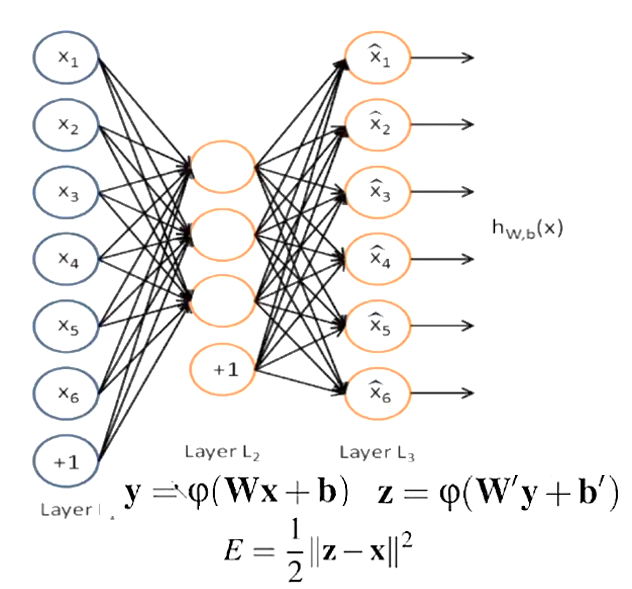

In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Input layer
input_layer = Input(shape=(x_train.shape[1],))

# Bottleneck layer
bottleneck_layer = Dense(32, activation='relu', name='bottleneck')(input_layer)

# Output layer
output_layer = Dense(x_train.shape[1], activation='sigmoid', name='output')(bottleneck_layer)

# Build the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(
    x_train,
    x_train,  # Input and target are the same
    epochs=20,
    batch_size=256,
    validation_data=(x_test, x_test)
)

# Evaluate reconstruction performance
reconstructed_data = autoencoder.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x_test, reconstructed_data)
print("Reconstruction Mean Squared Error:", mse)

# Save the model
autoencoder.save('mnist_autoencoder.h5')
print("Model saved as 'mnist_autoencoder.h5'")



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1070 - val_loss: 0.0414
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0380 - val_loss: 0.0296
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0282 - val_loss: 0.0233
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0226 - val_loss: 0.0195
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190 - val_loss: 0.0168
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166 - val_loss: 0.0148
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0147 - val_loss: 0.0133
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0133 - val_loss: 0.0122
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Reconstruction Mean Squared Error: 0.009970445185899734
Model saved as 'mnist_autoencoder.h5'


In [2]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Input layer
input_layer = Input(shape=(x_train.shape[1],))

# Encoder (Stacked layers)
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
bottleneck = Dense(64, activation='relu', name='bottleneck')(encoded)  # Increased bottleneck

# Decoder (Mirrored structure)
decoded = Dense(128, activation='relu')(bottleneck)
decoded = Dense(256, activation='relu')(decoded)
output_layer = Dense(x_train.shape[1], activation='sigmoid', name='output')(decoded)

# Build the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(
    x_train,
    x_train,  # Input and target are the same
    epochs=20,
    batch_size=256,
    validation_data=(x_test, x_test)
)

# Evaluate reconstruction performance
reconstructed_data = autoencoder.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x_test, reconstructed_data)
print("Reconstruction Mean Squared Error:", mse)

# Save the model
autoencoder.save('mnist_stacked_autoencoder.h5')
print("Model saved as 'mnist_stacked_autoencoder.h5'")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,944 (1.85 MB)

 Trainable params: 484,944 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0855 - val_loss: 0.0265
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - val_loss: 0.0175
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0171 - val_loss: 0.0146
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - val_loss: 0.0124
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - val_loss: 0.0096
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - val_loss: 0.0089
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086 - val_loss: 0.0082
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Reconstruction Mean Squared Error: 0.005972005892544985
Model saved as 'mnist_stacked_autoencoder.h5'


<ul>
<li><strong style="color: #e74c3c;">Changes in Architecture </strong>
    <ul>
      <li><strong>Bottleneck size:</strong> <span style="color: #d4bf91;">32 → 64</span></li>
      <li><strong>Added layers:</strong> <span style="color: #d4bf91;">256 → 128 → 64 → 128 → 256</span></li>
    </ul>
  </li>

<li><strong style="color: #e74c3c;">Effect on Reconstruction MSE </strong>
    <ul>
      <li><strong>Before:</strong> <span style="color: #d4bf91;">0.009970445185899734</span></li>
      <li><strong>After:</strong> <span style="color: #d4bf91;">0.005972005892544985</span></li>
      <li><strong>Result:</strong> <span style="color: #d4bf91; font-weight: bold;">Decreased MSE → Better reconstruction</span></li>
      <li><strong>Reason:</strong> More layers + larger bottleneck = <span style="color: #d4bf91;">better feature extraction and compression.</span></li>
    </ul>
  </li>

</ul>
</div>


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


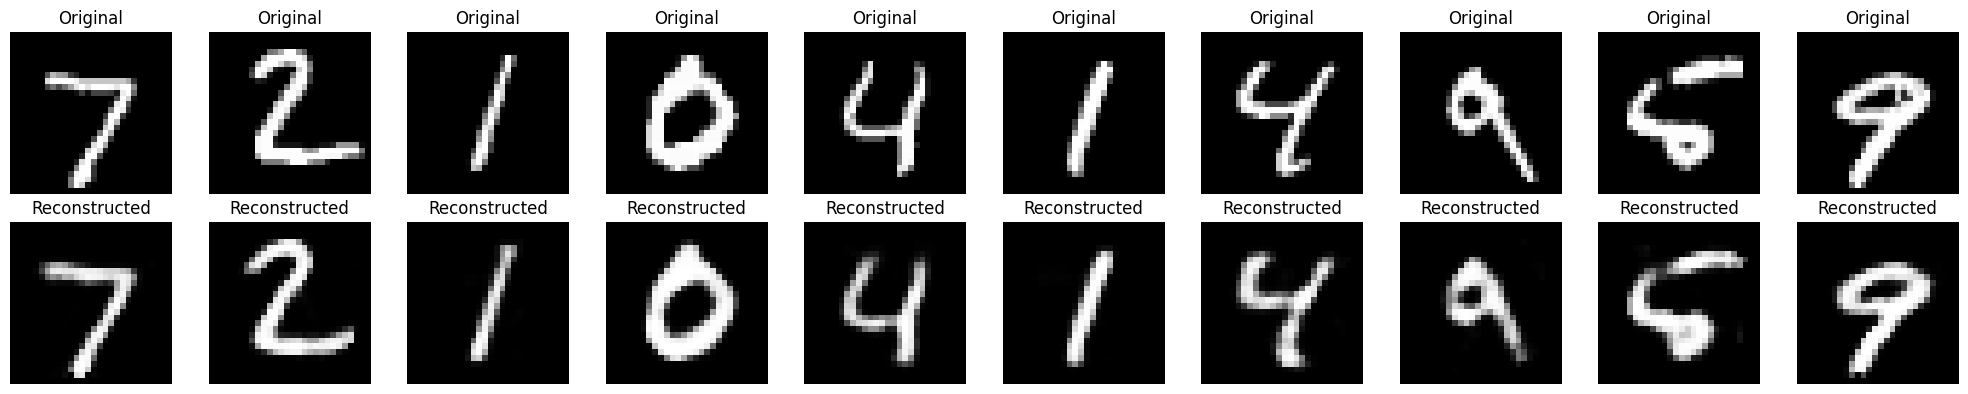

In [3]:
import matplotlib.pyplot as plt

# Function to plot original and reconstructed images
def plot_original_and_reconstructed(original, reconstructed, n=10):
    """
    Plots the original and reconstructed images side by side.
    :param original: Original images (numpy array).
    :param reconstructed: Reconstructed images (numpy array).
    :param n: Number of images to display.
    """
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Original")

        # Reconstructed images
        plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Reconstructed")

    plt.tight_layout()
    plt.show()

# Predict reconstructed images
reconstructed_data = autoencoder.predict(x_test)

# Plot the results
plot_original_and_reconstructed(x_test, reconstructed_data)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0958 - val_loss: 0.0366
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0332 - val_loss: 0.0252
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0248 - val_loss: 0.0211
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0209 - val_loss: 0.0185
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185 - val_loss: 0.0171
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171 - val_loss: 0.0158
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0150 - val_loss: 0.0144
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - val_loss: 0.0135
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - val_loss: 0.0130
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132 - val_loss: 0.0126
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

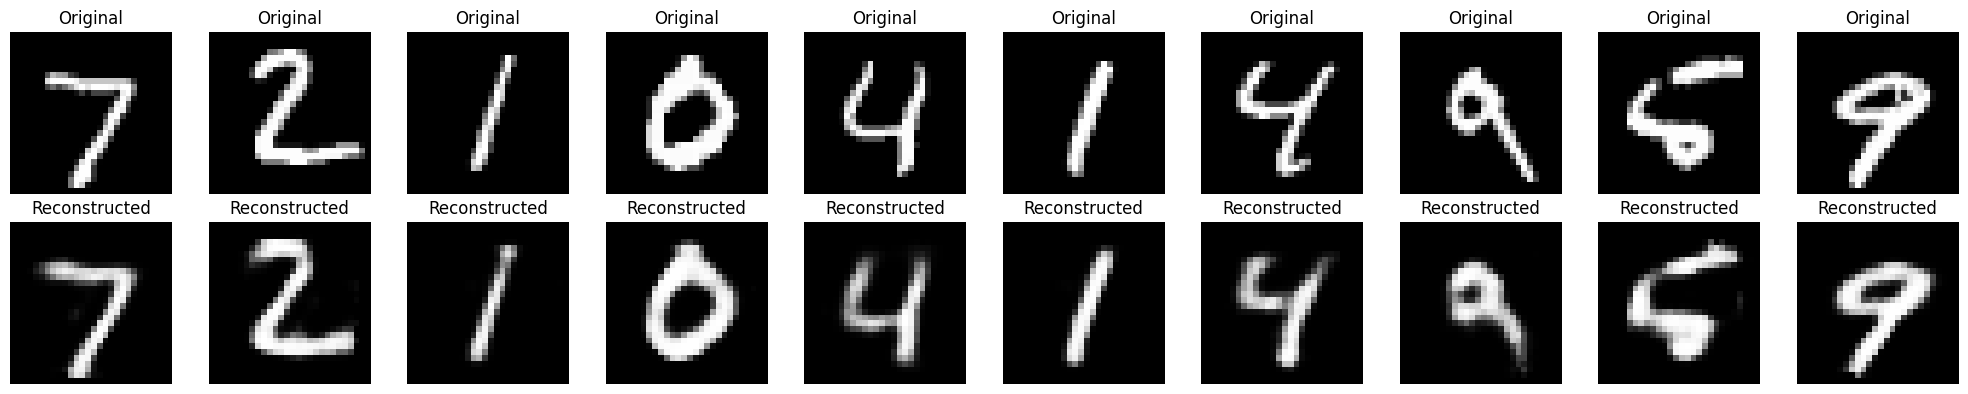

In [4]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], -1))  # Flatten images
x_test = x_test.reshape((x_test.shape[0], -1))

# Input layer
input_layer = Input(shape=(x_train.shape[1],))

# Encoder: Stacked layers
encoder_layer1 = Dense(128, activation='relu')(input_layer)
encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
bottleneck_layer = Dense(32, activation='relu', name='bottleneck')(encoder_layer2)

# Decoder: Stacked layers
decoder_layer1 = Dense(64, activation='relu')(bottleneck_layer)
decoder_layer2 = Dense(128, activation='relu')(decoder_layer1)
output_layer = Dense(x_train.shape[1], activation='sigmoid', name='output')(decoder_layer2)

# Build the stacked autoencoder model
stacked_autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
stacked_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
stacked_autoencoder.summary()

# Train the model
stacked_autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_test, x_test)
)

# Visualize results
import matplotlib.pyplot as plt

def plot_original_and_reconstructed(original, reconstructed, n=10):
    """
    Plots the original and reconstructed images side by side.
    :param original: Original images (numpy array).
    :param reconstructed: Reconstructed images (numpy array).
    :param n: Number of images to display.
    """
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Original")

        # Reconstructed images
        plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Reconstructed")

    plt.tight_layout()
    plt.show()

# Predict reconstructed images
reconstructed_data = stacked_autoencoder.predict(x_test)

# Plot the results
plot_original_and_reconstructed(x_test, reconstructed_data)


-------------------------------------------------------------------------------

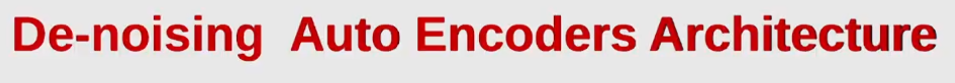

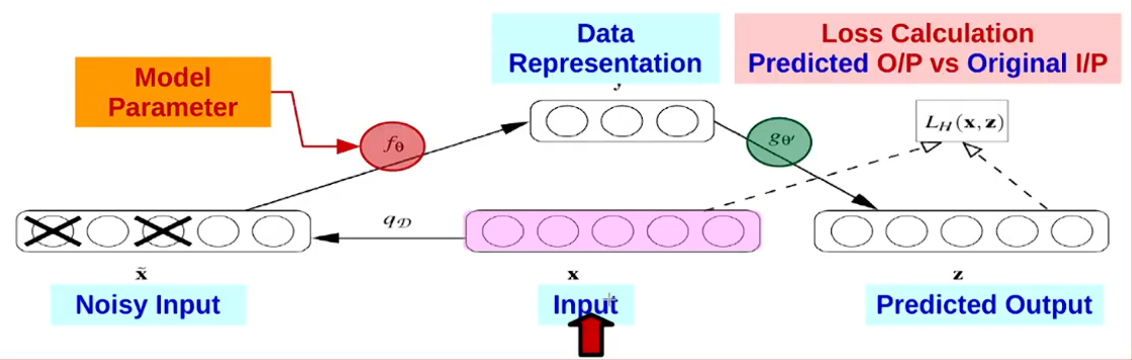

# Q12: for code below Denoising Autoencoder with 4 layer encoder and 4 layer decoder.Redesign it again with 6 layer encoder and 6 layer decoder add your design image here and what the benefit for using Bottleneck with 2 nodes after rebuild your answers kindly  prove your answer by any visual proven

your image will Provide a detailed explanation of your choices for the encoder and decoder layers, activation functions, and other hyperparameters. Justify how your design should lead to good performance and what kind of results you expect.

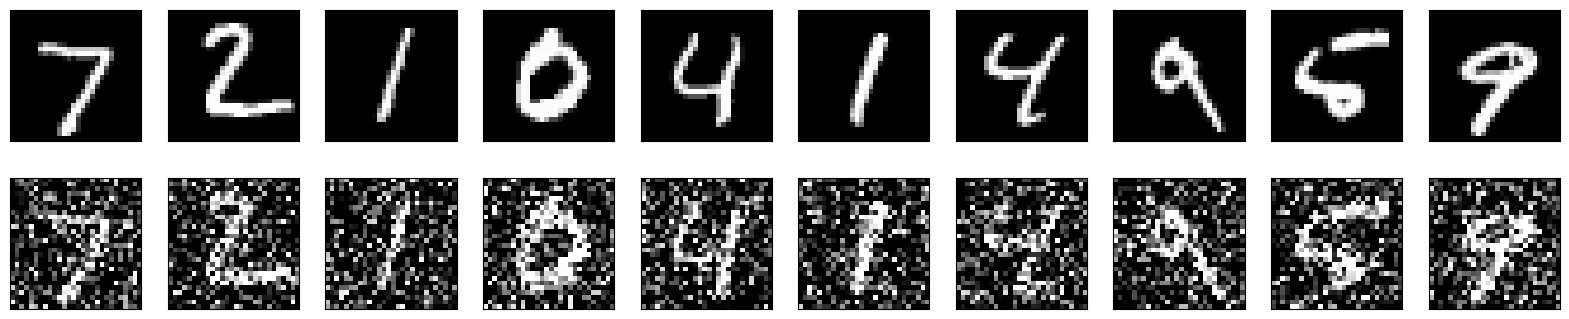

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0632
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0496
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0468
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0451
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0440
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


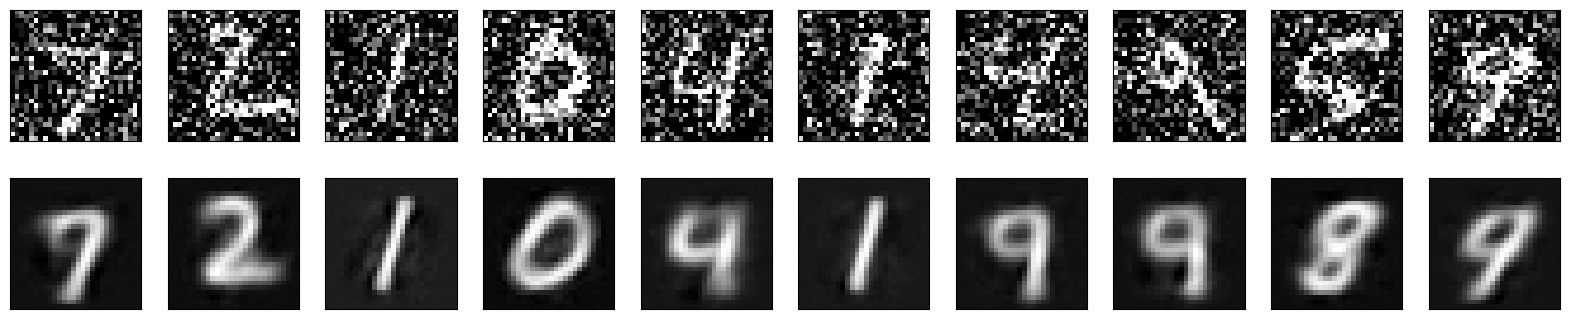

In [ ]:
import numpy as np

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

np.random.seed(33)   # random seed，to reproduce results.

ENCODING_DIM_INPUT = 784
ENCODING_DIM_LAYER1 = 128
ENCODING_DIM_LAYER2 = 64
ENCODING_DIM_LAYER3 = 10
ENCODING_DIM_OUTPUT = 2
EPOCHS = 5
BATCH_SIZE = 64
NOISE_FACTOR = 0.5

def train(x_train_noisy, x_train):

    # input placeholder
    input_image = Input(shape=(ENCODING_DIM_INPUT, ))

    # encoding layer
    encode_layer1 = Dense(ENCODING_DIM_LAYER1, activation='relu')(input_image)
    encode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(encode_layer1)
    encode_layer3 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_layer2)
    encode_output = Dense(ENCODING_DIM_OUTPUT)(encode_layer3)

    # decoding layer
    decode_layer1 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_output)
    decode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(decode_layer1)
    decode_layer3 = Dense(ENCODING_DIM_LAYER1, activation='relu')(decode_layer2)
    decode_output = Dense(ENCODING_DIM_INPUT, activation='tanh')(decode_layer3)

    # build autoencoder, encoder
    autoencoder = Model(inputs=input_image, outputs=decode_output)
    encoder = Model(inputs=input_image, outputs=encode_output)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(x_train_noisy, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder

def add_noise(x_train, x_test):
    """
    add noise.
    :return:
    """
    x_train_noisy = x_train + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
    x_test_noisy = x_test + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)     # limit into [0, 1]
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)   # limit into [0, 1]

    return x_train_noisy, x_test_noisy


def show_images(decode_images, x_test):
    """
    plot the images.
    :param decode_images: the images after decoding
    :param x_test: testing data
    :return:
    """
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

if __name__ == '__main__':
    # Step1： load data  x_train: (60000, 28, 28), y_train: (60000,) x_test: (10000, 28, 28), y_test: (10000,)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Step2: normalize
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 784), x_test: (10000, 784), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Step4: add noisy
    x_train_noisy, x_test_noisy = add_noise(x_train, x_test)
    # show the contrast before noising and after noising.
    show_images(x_test_noisy, x_test)

    # Step5： train
    encoder,autoencoder = train(x_train_noisy=x_train_noisy, x_train=x_train)

    # test and plot
    encode_images = encoder.predict(x_test_noisy)
    # plot_representation(encode_images, y_test)

    # show images
    decode_images = autoencoder.predict(x_test_noisy)
    show_images(decode_images, x_test_noisy)

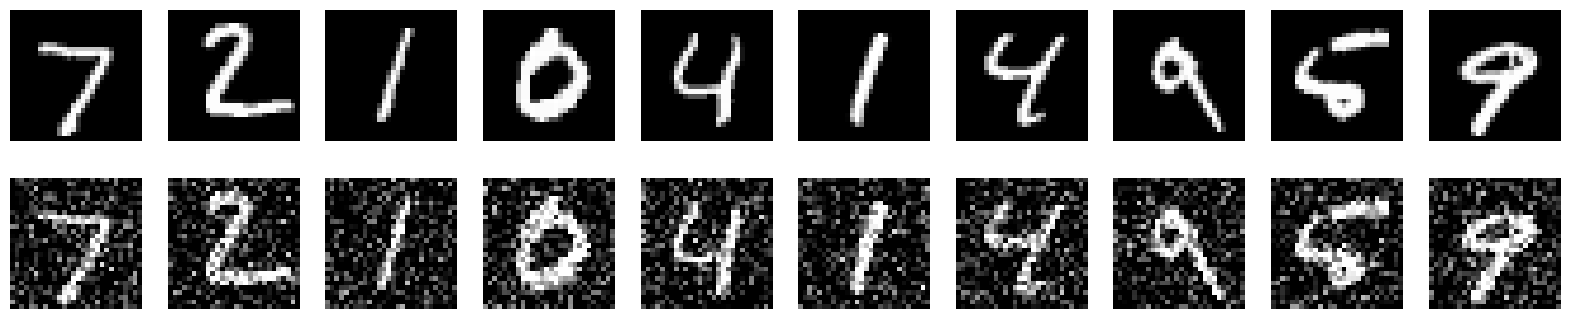

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0764
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0503
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0463
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0417
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0378
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0355
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0338
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0327
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0318
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0311
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0303
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0300
Epoch 13/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0295
Epoch 14/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0290
Epoch 15/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

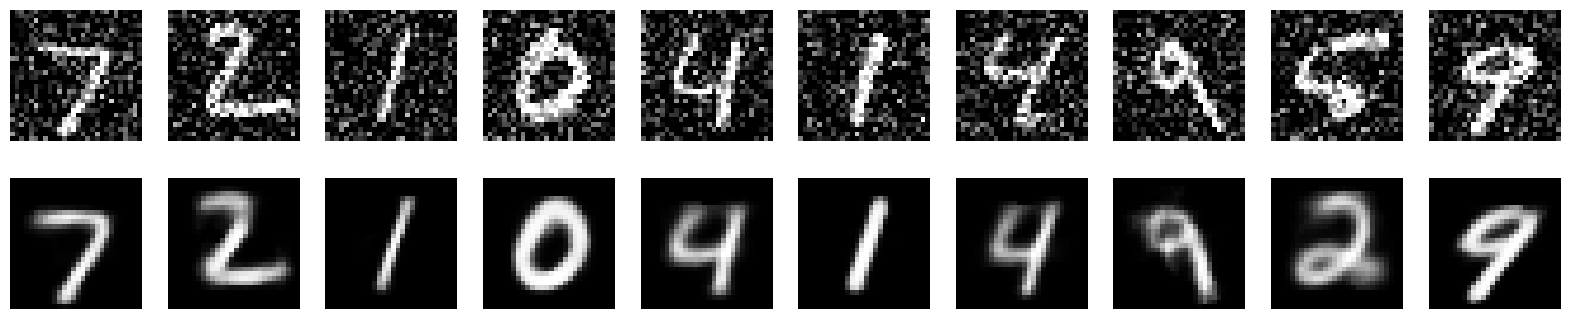

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

np.random.seed(33)

# Updated Layer Sizes
ENCODING_DIM_INPUT = 784
ENCODING_DIM_LAYER1 = 256
ENCODING_DIM_LAYER2 = 128
ENCODING_DIM_LAYER3 = 64
ENCODING_DIM_LAYER4 = 32
ENCODING_DIM_LAYER5 = 16
ENCODING_DIM_OUTPUT = 16  # Bigger bottleneck for better feature retention
EPOCHS = 20  # Increase epochs
BATCH_SIZE = 64
NOISE_FACTOR = 0.3  # Reduce noise level

def train(x_train_noisy, x_train):
    input_image = Input(shape=(ENCODING_DIM_INPUT, ))

    # Encoding (6 layers)
    encode_layer1 = Dense(ENCODING_DIM_LAYER1, activation='relu')(input_image)
    encode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(encode_layer1)
    encode_layer3 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_layer2)
    encode_layer4 = Dense(ENCODING_DIM_LAYER4, activation='relu')(encode_layer3)
    encode_layer5 = Dense(ENCODING_DIM_LAYER5, activation='relu')(encode_layer4)
    encode_output = Dense(ENCODING_DIM_OUTPUT, activation='sigmoid')(encode_layer5)  # Use sigmoid to retain details

    # Decoding (6 layers)
    decode_layer1 = Dense(ENCODING_DIM_LAYER5, activation='relu')(encode_output)
    decode_layer2 = Dense(ENCODING_DIM_LAYER4, activation='relu')(decode_layer1)
    decode_layer3 = Dense(ENCODING_DIM_LAYER3, activation='relu')(decode_layer2)
    decode_layer4 = Dense(ENCODING_DIM_LAYER2, activation='relu')(decode_layer3)
    decode_layer5 = Dense(ENCODING_DIM_LAYER1, activation='relu')(decode_layer4)
    decode_output = Dense(ENCODING_DIM_INPUT, activation='sigmoid')(decode_layer5)  # Use sigmoid for better results

    autoencoder = Model(inputs=input_image, outputs=decode_output)
    encoder = Model(inputs=input_image, outputs=encode_output)

    autoencoder.compile(optimizer='adam', loss='mse')

    autoencoder.fit(x_train_noisy, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder

def add_noise(x_train, x_test):
    x_train_noisy = x_train + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
    x_test_noisy = x_test + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
    return np.clip(x_train_noisy, 0., 1.), np.clip(x_test_noisy, 0., 1.)

def show_images(decode_images, x_test):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
        ax.axis('off')

        ax = plt.subplot(2, n, i+1+n)
        ax.imshow(decode_images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')

    plt.show()

if __name__ == '__main__':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    x_train_noisy, x_test_noisy = add_noise(x_train, x_test)

    show_images(x_test_noisy, x_test)

    encoder, autoencoder = train(x_train_noisy, x_train)

    decode_images = autoencoder.predict(x_test_noisy)
    show_images(decode_images, x_test_noisy)


# Advanced Part (optional)

# Q13 Convert your TensorFlow model to PyTorch. Provide the PyTorch code equivalent of your TensorFlow model, ensuring that the architecture, hyperparameters, and any custom layers or functionalities are correctly translated."

In [6]:
# %pip install torch torchvision  

Using device: cpu


100%|██████████| 9.91M/9.91M [00:21<00:00, 455kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 186kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 554kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.01MB/s]


Epoch [1/20], Loss: 0.0636
Epoch [2/20], Loss: 0.0509
Epoch [3/20], Loss: 0.0442
Epoch [4/20], Loss: 0.0399
Epoch [5/20], Loss: 0.0362
Epoch [6/20], Loss: 0.0340
Epoch [7/20], Loss: 0.0329
Epoch [8/20], Loss: 0.0320
Epoch [9/20], Loss: 0.0312
Epoch [10/20], Loss: 0.0304
Epoch [11/20], Loss: 0.0298
Epoch [12/20], Loss: 0.0294
Epoch [13/20], Loss: 0.0289
Epoch [14/20], Loss: 0.0286
Epoch [15/20], Loss: 0.0282
Epoch [16/20], Loss: 0.0279
Epoch [17/20], Loss: 0.0277
Epoch [18/20], Loss: 0.0274
Epoch [19/20], Loss: 0.0272
Epoch [20/20], Loss: 0.0271


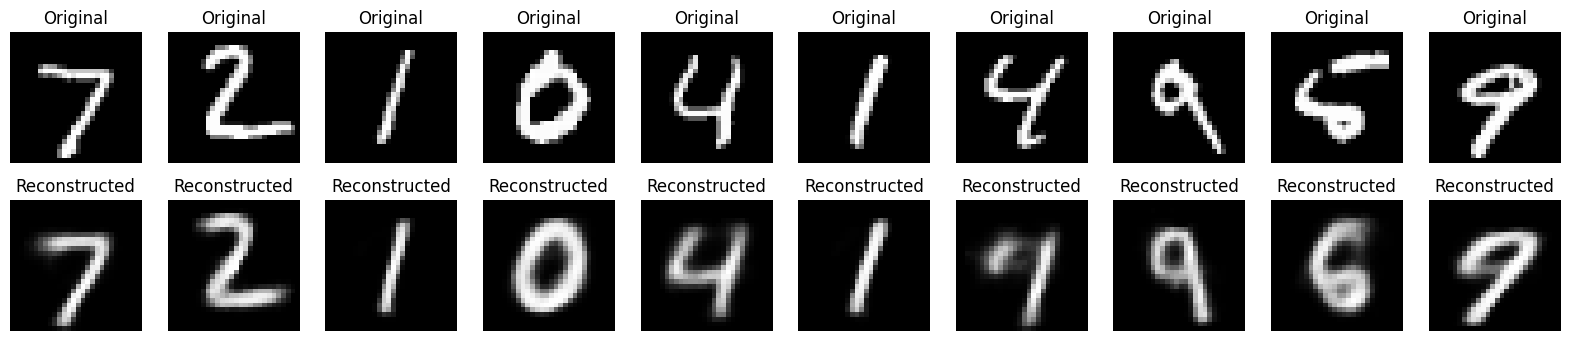

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seed for reproducibility
torch.manual_seed(33)

# Hyperparameters
ENCODING_DIM_INPUT = 784
ENCODING_DIM_LAYER1 = 256
ENCODING_DIM_LAYER2 = 128
ENCODING_DIM_LAYER3 = 64
ENCODING_DIM_LAYER4 = 32
ENCODING_DIM_LAYER5 = 16
ENCODING_DIM_OUTPUT = 8
EPOCHS = 20
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NOISE_FACTOR = 0.5

# Define Denoising Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder: 6 layers
        self.encoder = nn.Sequential(
            nn.Linear(ENCODING_DIM_INPUT, ENCODING_DIM_LAYER1),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER1, ENCODING_DIM_LAYER2),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER2, ENCODING_DIM_LAYER3),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER3, ENCODING_DIM_LAYER4),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER4, ENCODING_DIM_LAYER5),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER5, ENCODING_DIM_OUTPUT),
        )

        # Decoder: 6 layers
        self.decoder = nn.Sequential(
            nn.Linear(ENCODING_DIM_OUTPUT, ENCODING_DIM_LAYER5),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER5, ENCODING_DIM_LAYER4),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER4, ENCODING_DIM_LAYER3),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER3, ENCODING_DIM_LAYER2),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER2, ENCODING_DIM_LAYER1),
            nn.ReLU(),
            nn.Linear(ENCODING_DIM_LAYER1, ENCODING_DIM_INPUT),
            nn.Sigmoid()  # FIX: Use Sigmoid instead of Tanh
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Load MNIST dataset with noise
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Lambda(lambda x: x.view(784))  # FIX: Explicit flattening
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Function to add noise
def add_noise(data, noise_factor=NOISE_FACTOR):
    noise = noise_factor * torch.randn_like(data)
    noisy_data = data + noise
    return torch.clamp(noisy_data, 0., 1.)  # FIX: Keep values within range [0,1]

# Initialize model, loss function, and optimizer
autoencoder = Autoencoder().to(device)  # FIX: Move model to GPU
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(EPOCHS):
    autoencoder.train()  # Set model to training mode
    epoch_loss = 0
    for images, _ in train_loader:
        images = images.to(device)  # FIX: Move images to GPU
        noisy_images = add_noise(images)

        optimizer.zero_grad()
        outputs = autoencoder(noisy_images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss / len(train_loader):.4f}")

# Test and visualize results
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].cpu().reshape(28, 28), cmap='gray')  # FIX: Move to CPU for plotting
        plt.axis('off')
        plt.title("Original")

        # Reconstructed
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].cpu().reshape(28, 28), cmap='gray')  # FIX: Move to CPU for plotting
        plt.axis('off')
        plt.title("Reconstructed")

    plt.show()

# Testing the model
autoencoder.eval()  # FIX: Set model to evaluation mode
with torch.no_grad():
    test_images, _ = next(iter(test_loader))
    test_images = test_images.to(device)  # FIX: Move images to GPU
    noisy_test_images = add_noise(test_images)
    reconstructed_images = autoencoder(noisy_test_images)

# Plot results
plot_images(test_images, reconstructed_images)


# Q14 Finally, print the accuracy for each model architecture. Discuss with your team the differences observed in accuracy across various architectures, and analyze the potential reasons behind these variations."

# Callback

# Q15 search for Callback method In TensorFlow and Keras, a callback is a set of functions that can be applied at various stages of the training process, allowing you to customize the behavior of the training loop. Callbacks provide a way to monitor and intervene during training, enabling features 

# Tensorboard!!!!!!

#Q16

 Review the following code and provide a detailed explanation of how it works. Describe each section and its purpose, and explain how the code achieves its intended functionality.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Split data into training and validation sets
X_val, X_train = X_train[:10000], X_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(optimizer, X_train, y_train, X_val, y_val):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=10, 
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'AdaDelta': tf.keras.optimizers.Adadelta(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adam': tf.keras.optimizers.Adam()
}

# Train and evaluate models with different optimizers
results = {}
for name, optimizer in optimizers.items():
    accuracy = train_and_evaluate(optimizer, X_train, y_train, X_val, y_val)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"Optimizer: {name}, Validation Accuracy: {accuracy:.4f}")


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Optimizer: SGD, Validation Accuracy: 0.9476
Optimizer: Momentum, Validation Accuracy: 0.9745
Optimizer: RMSprop, Validation Accuracy: 0.9766
Optimizer: AdaDelta, Validation Accuracy: 0.7654
Optimizer: Adagrad, Validation Accuracy: 0.9085
Optimizer: Adam, Validation Accuracy: 0.9787


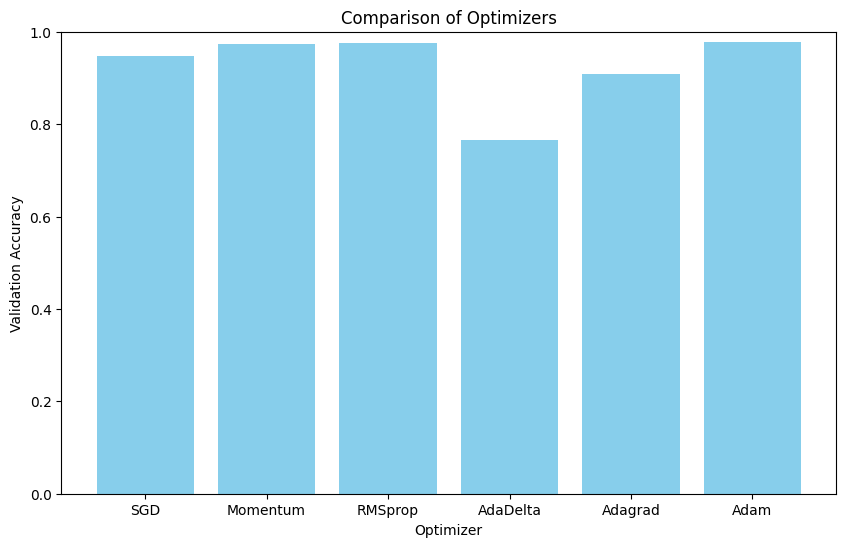

In [5]:
# Plotting the results
names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Optimizers')
plt.ylim([0, 1])
plt.show()

# Anothe challenge

# In this dataset, all deep learning architectures attempted so far have resulted in overfitting. Explore and apply various techniques to mitigate overfitting, such as regularization, dropout, data augmentation, and early stopping. Please provide feedback on the effectiveness of each method and summarize your results.

# Dataset Description

This dataset contains information related to students in an educational context. It includes various demographic, behavioral, and academic features, which can be used to analyze student performance and engagement. The dataset consists of the following attributes:

- **gender:** The gender of the student (e.g., male, female).
- **NationalITy:** The nationality of the student, which may influence educational outcomes.
- **PlaceofBirth:** The geographic location where the student was born, providing insights into potential cultural and socio-economic factors.
- **StageID:** The educational stage or level the student is currently in (e.g., primary, secondary).
- **GradeID:** The grade or year the student is enrolled in, indicating their progress in the education system.
- **SectionID:** The specific section or class within a grade that the student belongs to.
- **Topic:** The subject or topic of study, relevant for performance analysis in specific areas.
- **Semester:** The semester in which the data was collected, which may affect academic performance and engagement.
- **Relation:** The relationship of the student with their parents (e.g., mother, father), potentially influencing support and academic outcomes.
- **raisedhands:** The number of times the student raised their hands in class, indicating participation and engagement.
- **VisITedResources:** The number of educational resources the student has accessed, which reflects their engagement with the material.
- **AnnouncementsView:** The number of times the student viewed announcements from the school, suggesting their awareness of important updates.
- **Discussion:** The level of participation in discussions, indicating engagement in collaborative learning.
- **ParentAnsweringSurvey:** Responses from parents in a survey, which may provide insights into parental involvement.
- **ParentschoolSatisfaction:** The satisfaction level of parents with the school, which could correlate with student performance.
- **StudentAbsenceDays:** The number of days the student was absent, which can impact learning outcomes.
- **Class:** The target variable indicating the student's performance category or final grade, often used for classification tasks.

**Challenges:** The dataset may exhibit challenges such as class imbalance, varying levels of engagement among students, and the influence of external factors on academic performance.

This dataset is suitable for analysis aimed at understanding student behavior, predicting academic outcomes, and identifying factors contributing to student success or challenges.


In [ ]:
import os

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Dataset.csv')
df.loc[df["Class"] == "L", "Class"] = 0
df.loc[df["Class"] == "M", "Class"] = 1
df.loc[df["Class"] == "H", "Class"] = 2
display(df)
print(df.columns)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,0
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,1
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,1
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,0


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')
